In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

In [2]:
Beds_Occupied=pd.read_csv("Beds_Occupied.csv")
Beds_Occupied.head()

,collection_date,Total Inpatient Beds
0,15-06-2020,293
1,16-06-2020,295
2,17-06-2020,290
3,18-06-2020,291
4,19-06-2020,288


In [3]:
BO=Beds_Occupied.rename(columns={"collection_date":"CD","Total Inpatient Beds":"TIB"})

In [4]:
BO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CD      359 non-null    object
 1   TIB     359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [5]:
BO.describe()

,TIB
count,359.000000
mean,241.983287
std,28.936836
min,190.000000
25%,219.000000
50%,235.000000
75%,259.000000
max,341.000000


<AxesSubplot:>

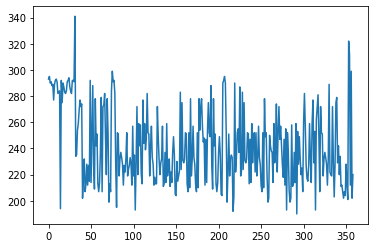

In [6]:
BO.TIB.plot()

<AxesSubplot:ylabel='Density'>

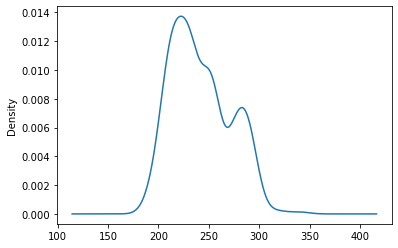

In [7]:
BO.TIB.plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

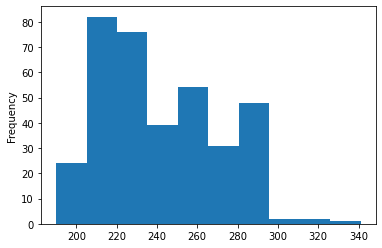

In [8]:
BO.TIB.plot(kind='hist')

In [9]:
v=pd.read_csv('Beds_Occupied.csv',header=0,index_col=0,parse_dates=True,squeeze=True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

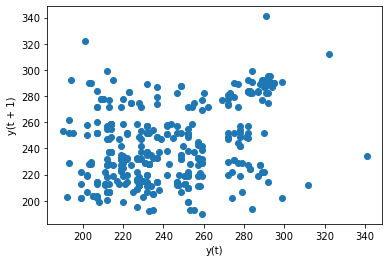

In [10]:
lag_plot(v)

In [11]:
train = BO.head(251)
test = BO.tail(108)

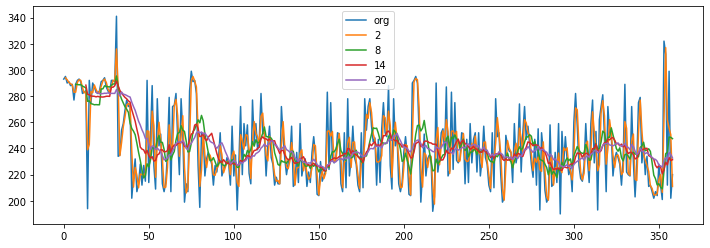

In [12]:
plt.figure(figsize=(12,4))
BO.TIB.plot(label="org")
for i in range(2,24,6):
    BO["TIB"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [13]:
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

In [14]:
from statsmodels.tsa.holtwinters import Holt

In [15]:
hw_model = Holt(train["TIB"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hw,test.TIB) 

C:\Users\smhac\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-15-44974105d3fa>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train["TIB"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


290.28413801510703

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [18]:
hwe_model_add_add = ExponentialSmoothing(train["TIB"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_add_add,test.TIB) 

29.13812349658199

In [19]:
hwe_model_mul_add = ExponentialSmoothing(train["TIB"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_mul_add,test.TIB)

29.17584882433296

In [22]:
hwe_model_add_add_new = ExponentialSmoothing(BO["TIB"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [23]:
hwe_model_add_add_new .forecast(30)

359    231.076028
360    229.335180
361    237.602579
362    238.408479
363    245.137525
364    233.019446
365    239.286166
366    233.660803
367    235.863899
368    234.252061
369    234.864603
370    233.566594
371    230.988134
372    229.247286
373    237.514685
374    238.320585
375    245.049631
376    232.931552
377    239.198272
378    233.572909
379    235.776005
380    234.164167
381    234.776709
382    233.478700
383    230.900240
384    229.159392
385    237.426791
386    238.232690
387    244.961736
388    232.843658
dtype: float64